In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import MultiPolygon, Point
import json
import contextily as ctx

In [2]:
# Lege Radius für Einzugsbereiche der U-Bahn Haltestellen fest
r = 553

In [3]:
# U5 Haltestellen mit Namen und Koordinaten aus CSV lesen
df = pd.read_csv('U5_Haltestellen.csv')

# Koordinatenpunkte als Geometrie erstellen (angenommen, die Koordinaten sind in EPSG:4326)
df['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# Wandle den DataFrame in ein GeoDataFrame um
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Setze das Koordinatensystem auf EPSG:4326 (WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Reprojiziere in EPSG:25832 (UTM Zone 32N), um Buffers in Metern zu erstellen
gdf = gdf.to_crs(epsg=25832)

# Erstelle einen Buffer von r Metern um jede Haltestelle
r = 500  # Beispielwert für den Buffer-Radius in Metern
gdf['buffer'] = gdf['geometry'].buffer(r)

# Setze den Namen der Haltestellen als Index
#gdf.set_index('name', inplace=True)

# Setze den Buffer als Geometrie
gdf = gdf.set_geometry('buffer')

# Optional: Wenn du die Geometrien wieder in EPSG:25832 behalten willst, brauchst du keine weitere Reprojektion.

# Zeige das Ergebnis an
#gdf


In [4]:
# Lese aus JSON die Daten des Zensus aus
stat_dat_komplett = gpd.read_file('regiodaten.json')

# behalte nur Daten aus 2022, da es der aktuellste vollständige Datensatz ist
stat_dat = stat_dat_komplett[stat_dat_komplett['jahr'] == '2022']

stat_dat.set_crs(epsg=25832, inplace = True, allow_override=True)

# setze stadtteilnamen als Index
#stat_dat = stat_dat.set_index('stadtteil')


#stat_dat

/home/nilspipa/.local/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,jahr,jahr_date,jahr_timestamp,verwaltungseinheit,stadtteil_nr,stadtteil,bezirk_nr,bezirk,bev_insgesamt,...,bev_ab80_migrationshintergrund_ant_an_altersgrp_proz,bevb_zuzuege_u6_anz,bevb_zuzuege_u18_anz,bevb_zuzuege_18_bis_u65_anz,bevb_zuzuege_ab65_anz,bevb_fortzuege_u6_anz,bevb_fortzuege_u18_anz,bevb_fortzuege_18_bis_u65_anz,bevb_fortzuege_ab65_anz,geometry
252,DE.HH.UP_REGIONALSTATISTISCHE_DATEN_STADTTEILE...,2022,2022-12-31,2022-12-31,Stadtteil,401,Hoheluft-Ost,4,Hamburg-Nord,9782,...,15.8,55.0,115.0,1115.0,45.0,140.0,190.0,1020.0,50.0,"MULTIPOLYGON (((564419.058 5937381.696, 564413..."
255,DE.HH.UP_REGIONALSTATISTISCHE_DATEN_STADTTEILE...,2022,2022-12-31,2022-12-31,Stadtteil,411,Ohlsdorf,4,Hamburg-Nord,17548,...,8.5,210.0,560.0,2225.0,110.0,210.0,420.0,1795.0,105.0,"MULTIPOLYGON (((568488.946 5940377.239, 568409..."
256,DE.HH.UP_REGIONALSTATISTISCHE_DATEN_STADTTEILE...,2022,2022-12-31,2022-12-31,Stadtteil,412,Fuhlsbüttel,4,Hamburg-Nord,13603,...,7.1,120.0,315.0,1385.0,60.0,140.0,270.0,1260.0,85.0,"MULTIPOLYGON (((567704.936 5942442.432, 567656..."
257,DE.HH.UP_REGIONALSTATISTISCHE_DATEN_STADTTEILE...,2022,2022-12-31,2022-12-31,Stadtteil,413,Langenhorn,4,Hamburg-Nord,47192,...,10.3,365.0,985.0,3780.0,240.0,320.0,700.0,2960.0,230.0,"MULTIPOLYGON (((567173.269 5948561.386, 567417..."
260,DE.HH.UP_REGIONALSTATISTISCHE_DATEN_STADTTEILE...,2022,2022-12-31,2022-12-31,Stadtteil,507,Bramfeld,5,Wandsbek,52980,...,9.6,355.0,815.0,3815.0,225.0,345.0,685.0,3260.0,285.0,"MULTIPOLYGON (((573536.333 5942057.699, 573545..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,DE.HH.UP_REGIONALSTATISTISCHE_DATEN_STADTTEILE...,2022,2022-12-31,2022-12-31,Stadtteil,707,Sinstorf,7,Harburg,4292,...,8.9,55.0,125.0,320.0,10.0,65.0,115.0,300.0,25.0,"MULTIPOLYGON (((565634.754 5920352.893, 565646..."
990,DE.HH.UP_REGIONALSTATISTISCHE_DATEN_STADTTEILE...,2022,2022-12-31,2022-12-31,Stadtteil,708,Marmstorf,7,Harburg,8988,...,6.1,55.0,110.0,460.0,45.0,35.0,75.0,410.0,70.0,"MULTIPOLYGON (((565020.53 5921319.453, 565026...."
991,DE.HH.UP_REGIONALSTATISTISCHE_DATEN_STADTTEILE...,2022,2022-12-31,2022-12-31,Stadtteil,709,Eißendorf,7,Harburg,25283,...,12.2,195.0,465.0,2180.0,100.0,155.0,315.0,1815.0,115.0,"MULTIPOLYGON (((564348.226 5923546.311, 564350..."
992,DE.HH.UP_REGIONALSTATISTISCHE_DATEN_STADTTEILE...,2022,2022-12-31,2022-12-31,Stadtteil,710,Heimfeld,7,Harburg,22591,...,14.3,200.0,475.0,2495.0,170.0,190.0,380.0,2260.0,125.0,"MULTIPOLYGON (((564246.268 5924775.069, 564223..."


In [5]:
# Grafische Darstellung der Stadtteile und U5 Einzugsbereiche

'''

fig, ax = plt.subplots(figsize = (10,10))

gdf.plot(ax = ax, alpha = 0.7, color = 'green')
stat_dat.plot(column = 'stadtteil' , alpha = 0.4, ax = ax)
#buffbuff.plot(alpha = 0.25, ax = ax)
ctx.add_basemap(ax, crs=gdf.crs.to_string())
plt.show()

'''

"\n\nfig, ax = plt.subplots(figsize = (10,10))\n\ngdf.plot(ax = ax, alpha = 0.7, color = 'green')\nstat_dat.plot(column = 'stadtteil' , alpha = 0.4, ax = ax)\n#buffbuff.plot(alpha = 0.25, ax = ax)\nctx.add_basemap(ax, crs=gdf.crs.to_string())\nplt.show()\n\n"

In [6]:
########################## Overlay einzelne Haltestellen mit Stadtteilen ##########################

overlay = gpd.overlay(gdf, stat_dat)
overlay['area'] = overlay.area

########################## Fläche Hamburg ##########################

# Fusioniere alle Stadtteile der U5 Haltestellen zu einem großen Multipolygon
ham_ges = stat_dat.union_all()

# Erstelle GeoDataFrame mit Gesamteinzugsbereich
fl_ges_ham = gpd.GeoDataFrame({'name': ['Einzugsbereich gesamt'],
                           'geometry': [ham_ges]})

# Setze CRS in EPSG:25832
fl_ges_ham = fl_ges_ham.set_crs(epsg=25832)

# Finde Querschnitte von Gesamteinzugsbereich und Stadtteilen
overlay_ges_ham = gpd.overlay(fl_ges_ham, stat_dat)

# Berechne Fläche der Querschnitte
overlay_ges_ham['area'] = overlay_ges_ham.area


########################## U5 Einzugsbereich ##########################

# Fusioniere Einzugsgebiete der U5 Haltestellen zu einem großen Multipolygon ohne Überlappungen
gdf_ges = gdf.union_all()

# Erstelle GeoDataFrame mit Gesamteinzugsbereich
fl_ges_u5 = gpd.GeoDataFrame({'name': ['Einzugsbereich gesamt'],
                           'geometry': [gdf_ges]})

# Setze CRS in EPSG:25832
fl_ges_u5 = fl_ges_u5.set_crs(epsg=25832)

# Finde Querschnitte von Gesamteinzugsbereich und Stadtteilen
overlay_ges_u5 = gpd.overlay(fl_ges_u5, stat_dat)

# Berechne Fläche der Querschnitte
overlay_ges_u5['area'] = overlay_ges_u5.area

# Interaktive Visualisierung
#overlay_ges_u5.explore(column = 'stadtteil')

In [7]:
########################## Fläche Hamburg ##########################

# summiere alle Flächen über die Stadtteile in Pivot Tabelle
fl_ham_stadtteil = pd.pivot_table(overlay_ges_ham, values = 'area', index = 'stadtteil', aggfunc = 'sum')

# Berechne Anteile der Stadtteile an Gesamtfläche Hamburg
fl_ham_stadtteil['Fläche anteil'] = fl_ham_stadtteil['area']/sum(fl_ham_stadtteil['area'])

# Bevölkerung im Stadtteil
fl_ham_stadtteil['Bev. Stadtteil'] = [stat_dat.loc[stat_dat['stadtteil'] == i]['bev_insgesamt'].iloc[0] for i in fl_ham_stadtteil.index]

# Anteil des Stadtviertels an Gesamtbevölkerung Hamburgs
fl_ham_stadtteil['Anteil der Bev. an Bev. Hamburg'] = fl_ham_stadtteil['Bev. Stadtteil']/sum(fl_ham_stadtteil['Bev. Stadtteil'])

# Haushalte im Stadtviertels
fl_ham_stadtteil['Haush. Stadtteil'] = [stat_dat.loc[stat_dat['stadtteil'] == i]['hau_privathaushalte_anz'].iloc[0] for i in fl_ham_stadtteil.index]

# Anteil des Stadtviertels an Haushalten in Hamburg
fl_ham_stadtteil['Anteil der Haush. an Haush. Hamburg'] = fl_ham_stadtteil['Haush. Stadtteil']/sum(fl_ham_stadtteil['Haush. Stadtteil'])



########################## U5 Einzugsbereich ##########################

# summiere alle Flächen über die Stadtteile in Pivot Tabelle
fl_u5_stadtteil = pd.pivot_table(overlay_ges_u5, values = 'area', index = 'stadtteil', aggfunc = 'sum')

# Berechne Anteile der Stadtteile an Gesamteinzugsbereich der U5
fl_u5_stadtteil['Anteil der Fläche an Gesamteinzugsgebiet'] = fl_u5_stadtteil['area']/sum(fl_u5_stadtteil['area'])

# Anteile der Fläche des Gesamteinzugsbereichs an Stadtteilen - A Querschnitt / A Stadtteil
fl_u5_stadtteil['Anteil des Gesamteinzugsgebiets an Stadtteilfläche'] = [fl_u5_stadtteil['area'].loc[i] / stat_dat.loc[stat_dat['stadtteil'] == i].area.iloc[0] for i in fl_u5_stadtteil.index]

# Bevölkerung im Einzugsbereich anteilig aus Fläche des Stadtviertels
fl_u5_stadtteil['Bev. im Einzugsgebiet U5'] = [fl_u5_stadtteil['Anteil des Gesamteinzugsgebiets an Stadtteilfläche'].loc[i] * stat_dat.loc[stat_dat['stadtteil'] == i]['bev_insgesamt'].iloc[0] for i in fl_u5_stadtteil.index]

# Anteil des Stadtviertels an Gesamtbevölkerung des U5 Einzugsbereichs
fl_u5_stadtteil['Anteil der Bev. an Bev. Gesamteinzugsgebiet'] = fl_u5_stadtteil['Bev. im Einzugsgebiet U5']/sum(fl_u5_stadtteil['Bev. im Einzugsgebiet U5'])

# Haushalte im Einzugsbereich anteilig aus Fläche des Stadtviertels
fl_u5_stadtteil['Haush. im Einzugsgebiet U5'] = [fl_u5_stadtteil['Anteil des Gesamteinzugsgebiets an Stadtteilfläche'].loc[i] * stat_dat.loc[stat_dat['stadtteil'] == i]['hau_privathaushalte_anz'].iloc[0] for i in fl_u5_stadtteil.index]

# Anteil des Stadtviertels an Haushalten des U5 Einzugsbereichs
fl_u5_stadtteil['Anteil der Haush. an Haush. Gesamteinzugsgebiet'] = fl_u5_stadtteil['Haush. im Einzugsgebiet U5']/sum(fl_u5_stadtteil['Haush. im Einzugsgebiet U5'])



In [8]:


###################################### Ausgewählte Indikatoren ######################################

bev_indikatoren = [
    'bev_u18_proz',
    'bev_18_bis_u30_proz',
    'bev_30_bis_u56_proz',
    'bev_ab56_proz',
    'bev_ab65_proz',
    'bev_auslaender_proz',
    'bev_migrationshintergrund_proz',
    'bev_u18_migrationshintergrund_proz',
    'bev_ab65_migrationshintergrund_proz',
    'wohn_avg_wohnflaeche_in_qm_pro_einw',
    'inf_schueler_in_gymn_an_allen_sekundarstufe_1_proz',
    'arb_arbeitslose_ingesamt_proz',
    'ver_private_pkw_je_1000_ew_anz',
]
    

hau_indikatoren = [
    'hau_haushaltgroesse_avg',
    'hau_einpersonenhaushalte_proz',
    'hau_haushalte_mit_kindern_proz',
    'hau_alleinerziehende_proz'
]



fl_indikatoren = [
    'flaeche_einw_pro_ha',
    'wohn_ant_sozialwohnungen_an_allen_wohnungen',
    'inf_niedergelassene_aerzte_anz',
    'wohn_avg_immobilienpreis_eigt_wohnung_euro_pro_qm',
]


In [9]:
def berechne_stat(indikatoren, bezugswert, gebiet):

    '''
    Berechnet für ein gegebenes Gebiet und eine Liste gegebener Indikatoren die aus den anteiligen Stadtteillächen zusammengesetzte
    Werte

    Liste str indikatoren: Liste mit Namen der Indikatoren
    str bezugswert: Name der Spalte des gebiets-DataFrames, die die jeweiligen Anteile an der untersuchten Population enthalten
    pd.DataFrame gebiet: DataFrame, das das zu untersuchende Gebiet in die jeweiligen Anteile an den Stadtteilen Hamburgs enthält

    Gibt Werte für Indikatoren als Liste zurück

    '''

    lst = []

    for i in indikatoren:
    
        wert = 0
        
        for stadtteil in gebiet.index:
    
            # Anteil des Stadtteils an der Gesamtfläche des U5 Einzuggebiets
            anteil = gebiet.loc[stadtteil][bezugswert]
    
            # Wert des Indikators i für den Stadtteil, als float
            stadtteil_wert = stat_dat.loc[stat_dat['stadtteil'] == stadtteil][i].iloc[0]

            if pd.isna(stadtteil_wert):
                continue
            
            stadtteil_wert = float(stadtteil_wert)

           
    
            # Berechne den Wert für Indikator i als Mittelwert über den Gesamteinzugsbereich, anteilig der Flächen pro Stadtgebiet
            wert = wert + anteil * stadtteil_wert
    
        lst.append(wert)

    return lst

In [10]:
# Berechne Werte für den gesamten U5 Einzugsbereich

bev_stat_u5 = berechne_stat(bev_indikatoren, 'Anteil der Bev. an Bev. Gesamteinzugsgebiet', fl_u5_stadtteil)

hau_stat_u5 = berechne_stat(hau_indikatoren, 'Anteil der Haush. an Haush. Gesamteinzugsgebiet', fl_u5_stadtteil)

fl_stat_u5 = berechne_stat(fl_indikatoren, 'Anteil der Fläche an Gesamteinzugsgebiet', fl_u5_stadtteil)

# Berechne Werte für alle Stadtteile Hamburgs

bev_stat_ham = berechne_stat(bev_indikatoren, 'Anteil der Bev. an Bev. Hamburg', fl_ham_stadtteil)

hau_stat_ham = berechne_stat(hau_indikatoren, 'Anteil der Haush. an Haush. Hamburg', fl_ham_stadtteil)

fl_stat_ham = berechne_stat(fl_indikatoren, 'Fläche anteil', fl_ham_stadtteil)


# Erstelle Statistik DataFrame durch Zusammenführen der berechneten Werte 

statistik = pd.DataFrame({ 
                            
                            'Indikatoren': bev_indikatoren + hau_indikatoren + fl_indikatoren,
                            'Hamburg gesamt': bev_stat_ham + hau_stat_ham + fl_stat_ham,
                            'U5 Einzugsbereich': bev_stat_u5 + hau_stat_u5 + fl_stat_u5
            
                            })

# Lege Indikatoren als Index fest
statistik = statistik.set_index('Indikatoren')

# Gebe DataFrame aus 
statistik

,Hamburg gesamt,U5 Einzugsbereich
Indikatoren,,
bev_u18_proz,16.914861,14.242991
bev_18_bis_u30_proz,15.541965,17.140092
bev_30_bis_u56_proz,38.097126,41.389183
bev_ab56_proz,29.454334,27.236871
bev_ab65_proz,17.856592,16.422228
bev_auslaender_proz,19.718112,17.442131
bev_migrationshintergrund_proz,39.281870,33.490543
bev_u18_migrationshintergrund_proz,55.338194,47.638187
bev_ab65_migrationshintergrund_proz,23.332840,21.664615


In [11]:
def berechne_anteile(gdf, stat_dat, name):
    """
    Berechnet verschiedene Anteile basierend auf der Fläche, Bevölkerung und Haushalten.
    
    Args:
    gdf (GeoDataFrame): Das Eingabedatenframe mit den Flächen.
    stat_dat (DataFrame): Ein weiteres Datenframe mit zusätzlichen statistischen Informationen (z.B. Bevölkerung, Haushalte).
    name (str): Name für die Spaltenbezeichnungen, z.B. 'Bornholmer Weg'.
    
    Returns:
    GeoDataFrame: Das Ausgangs-GDF mit zusätzlichen Spalten für Anteile, basierend auf dem übergebenen Namen.
    """
    
    # Summiere alle Flächen in den Stadtteilen
    gdf_result = pd.pivot_table(gdf, values='area', index='stadtteil', aggfunc='sum')
    
    # Anteil der Fläche am Gesamteinzugsbereich
    gdf_result[f'fl_anteil_{name}'] = gdf_result['area'] / gdf_result['area'].sum()

    # Anteil des Einzugsgebiets an der Fläche des Stadtteils
    gdf_result[f'fl_anteil_stadtteil_{name}'] = [gdf_result['area'].loc[i] / stat_dat.loc[stat_dat['stadtteil'] == i].area.iloc[0] for i in gdf_result.index]

    # Bevölkerung im Einzugsgebiet anteilig anhand der Fläche
    gdf_result[f'bev_{name}'] = [gdf_result[f'fl_anteil_stadtteil_{name}'].loc[i] * stat_dat.loc[stat_dat['stadtteil'] == i]['bev_insgesamt'].iloc[0] for i in gdf_result.index]

    # Anteil der Bevölkerung im Einzugsgebiet
    gdf_result[f'bev_anteil_{name}'] = gdf_result[f'bev_{name}'] / gdf_result[f'bev_{name}'].sum()

    # Haushalte im Einzugsgebiet anteilig anhand der Fläche
    gdf_result[f'hau_{name}'] = [gdf_result[f'fl_anteil_stadtteil_{name}'].loc[i] * stat_dat.loc[stat_dat['stadtteil'] == i]['hau_privathaushalte_anz'].iloc[0] for i in gdf_result.index]

    # Anteil der Haushalte im Einzugsgebiet
    gdf_result[f'hau_anteil_{name}'] = gdf_result[f'hau_{name}'] / gdf_result[f'hau_{name}'].sum()

    return gdf_result


In [12]:
def add_spalte(index, overlay = overlay):

    '''

    Berechnet für den Einzugsbereich einer Haltestelle die Werte für die ausgewählten 
    Bevölkerungs-, Haushalts- und Flächenbezogenen Indikatoren.

    str index: Name der Haltestelle 
    pd.DataFrame overlay: DataFrame, das alle Overlays aus den Einzugsbereichen der Haltestellen und den Stadtteilen der U5 enthält

    returns dataframe mit Index Indikatoren und Wertespalte

    '''

    gebiet = overlay[overlay['name'] == index]
    
    anteile_gebiet = berechne_anteile(gebiet, stat_dat, index)
    
    bev_stat_gebiet = berechne_stat(bev_indikatoren, f'bev_anteil_{index}', anteile_gebiet)
    
    hau_stat_gebiet = berechne_stat(hau_indikatoren, f'hau_anteil_{index}', anteile_gebiet)
    
    fl_stat_gebiet = berechne_stat(fl_indikatoren, f'fl_anteil_{index}', anteile_gebiet)
    
    output_df = pd.DataFrame({ 
                                
                                'Indikatoren': bev_indikatoren + hau_indikatoren + fl_indikatoren,
                                index: bev_stat_gebiet + hau_stat_gebiet + fl_stat_gebiet            
                                })
    
    output_df = output_df.set_index('Indikatoren')
    
    return output_df


In [13]:
# Berechne Werte der Indikatoren für den Einzugsbereich jeder einzelnen Haltestelle und hänge es dem statistik DataFrame an

for halt in overlay['name'].unique():
    
    statistik = statistik.join(add_spalte(halt))

In [14]:
# Altes Array mit den falschen Spaltennamen
old_columns = ['Hamburg gesamt', 'U5 Einzugsbereich', 'Bramfeld', 'Steilshoop',
               'BarmbekNord', 'B-Sengelmannstrae', 'CityNordStadtpark', 'B-Borgwerg',
               'Jarrestrae', 'Beethovenstrae', 'Uhlenhorst', 'StGeorg',
               'B-HauptbahnhofNord', 'B-Jungfernstieg', 'B-Stephansplatz',
               'Universitt', 'Grindelberg', 'B-Hoheluftbrcke', 'Grtnerstrae',
               'UniversittsklinikumE', 'Behrmannplatz', 'B-HagenbecksTierpark',
               'Sportplatzring', 'Stellingen', 'ArenenVolkspark']

# Neues Array mit den korrekten Umlauten
new_columns = ['Hamburg total', 'U5 Catchment Area', 'Bramfeld', 'Steilshoop',
               'BarmbekNord', 'B-Sengelmannstraße', 'CityNordStadtpark', 'B-Borgweg',
               'Jarrestraße', 'Beethovenstraße', 'Uhlenhorst', 'StGeorg',
               'B-HauptbahnhofNord', 'B-Jungfernstieg', 'B-Stephansplatz',
               'Universität', 'Grindelberg', 'B-Hoheluftbrücke', 'Gärtnerstraße',
               'UniversitätsklinikumE', 'Behrmannplatz', 'B-HagenbecksTierpark',
               'Sportplatzring', 'Stellingen', 'ArenenVolkspark']

# Aktualisieren der Spaltennamen mit den korrekten Umlauten
statistik.columns = new_columns


statistik.to_csv('SozStats_Pro_Haltestelle.csv')

statistik



,Hamburg total,U5 Catchment Area,Bramfeld,Steilshoop,BarmbekNord,B-Sengelmannstraße,CityNordStadtpark,B-Borgweg,Jarrestraße,Beethovenstraße,...,Universität,Grindelberg,B-Hoheluftbrücke,Gärtnerstraße,UniversitätsklinikumE,Behrmannplatz,B-HagenbecksTierpark,Sportplatzring,Stellingen,ArenenVolkspark
Indikatoren,,,,,,,,,,,,,,,,,,,,,
bev_u18_proz,16.914861,14.242991,15.616660,20.414109,13.925374,14.465690,13.207783,13.2,12.824500,12.297977,...,13.308696,13.719509,13.746140,13.191667,14.529123,17.6,16.832117,15.6,15.700968,19.314763
bev_18_bis_u30_proz,15.541965,17.140092,13.318666,14.086257,18.959155,17.665243,18.793022,18.8,18.939743,18.466798,...,18.228310,16.549478,15.702597,17.102543,17.326386,15.1,15.675912,16.6,16.544927,14.229228
bev_30_bis_u56_proz,38.097126,41.389183,36.353336,34.434356,41.861407,40.475819,43.382019,43.4,43.482969,43.302023,...,42.513164,41.673769,41.264820,43.159786,39.174807,38.1,38.637518,39.5,39.656041,37.166079
bev_ab56_proz,29.454334,27.236871,34.806672,30.968713,25.259483,27.393248,24.617176,24.6,24.752788,25.933202,...,25.949830,28.021304,29.262922,26.601300,29.069684,29.3,28.916059,28.3,28.093475,29.311999
bev_ab65_proz,17.856592,16.422228,21.255669,19.432639,14.590993,16.569514,14.313955,14.3,14.537932,15.812959,...,15.208586,16.678318,17.725080,15.987330,18.592912,18.9,18.477664,17.8,17.565939,17.719458
bev_auslaender_proz,19.718112,17.442131,15.891650,27.885273,18.203210,13.487289,13.400537,13.4,14.179811,15.461536,...,17.743276,14.641030,13.536568,12.657244,11.733053,16.8,18.796495,22.0,22.123915,23.426341
bev_migrationshintergrund_proz,39.281870,33.490543,35.238969,57.403184,35.787196,28.254667,27.604026,27.6,28.698538,30.798783,...,32.481237,28.424858,26.696545,25.392825,25.285405,33.5,35.534890,38.8,38.809179,46.713841
bev_u18_migrationshintergrund_proz,55.338194,47.638187,53.390300,77.665392,53.836097,42.367378,41.803489,41.8,44.262970,49.217809,...,40.010838,37.334166,36.118200,35.049575,36.185405,44.4,48.661750,55.5,55.408211,64.626305
bev_ab65_migrationshintergrund_proz,23.332840,21.664615,17.717315,30.766376,21.871011,16.732622,17.296511,17.3,18.437848,20.172060,...,23.523519,19.676570,18.741053,18.776035,16.189755,18.8,19.222336,19.9,20.010146,24.221469


In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_barchart(df, index, save_name=None, normieren=False):
    """
    Plottet ein Bar Chart für den angegebenen Index eines DataFrames und speichert optional das Bild als PNG.

    Args:
    df (DataFrame): Das Eingabedatenframe mit den Sozioökonomischen Indikatoren und den Einzugsbereichen.
    index (str): Der Name des Index, der geplottet werden soll.
    save_name (str, optional): Der Name, unter dem das Bild gespeichert werden soll (300 dpi). Standard ist None.
    normieren (bool, optional): Wenn True, werden die Werte bezüglich der zweiten Spalte (Hamburg gesamt) normalisiert. Standard ist False.

    Output:
    - Zeigt den Plot an.
    - Speichert das Bild als PNG, wenn `save_name` angegeben ist.
    """
    
    # Hole die Werte des angegebenen Indexes
    values = df.loc[index]

    # Wenn normieren=True, subtrahiere den Wert aus der zweiten Spalte (Hamburg gesamt)
    if normieren:
        hamburg_value = values.iloc[0]
        values = (values - hamburg_value) / hamburg_value * 100  # Berechnung der prozentualen Abweichung
    
    # Farben definieren: Erste zwei Balken heben sich ab
    colors = ['#FF6347', '#4682B4'] + ['#90EE90'] * (len(values) - 2)

    # Erstelle den Bar Chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(values.index, values, color=colors)

    # Labels und Titel
    if normieren:
        plt.ylabel('Abweichung (%) von Hamburg gesamt')
        plt.title(f'Prozentuale Abweichung für {index}')
    else:
        plt.ylabel(f'Wert für {index}')
        plt.title(f'Bar Chart für {index}')
    
    # Zeige den Plot
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Optional: Speichere das Bild als PNG
    if save_name:
        plt.savefig(f'{save_name}.png', dpi=300)
        print(f"Bild gespeichert als {save_name}.png mit 300 dpi.")

# Beispielaufruf:
# plot_barchart(df, 'Bevölkerung unter 18', save_name='bev_unter_18', normieren=True)


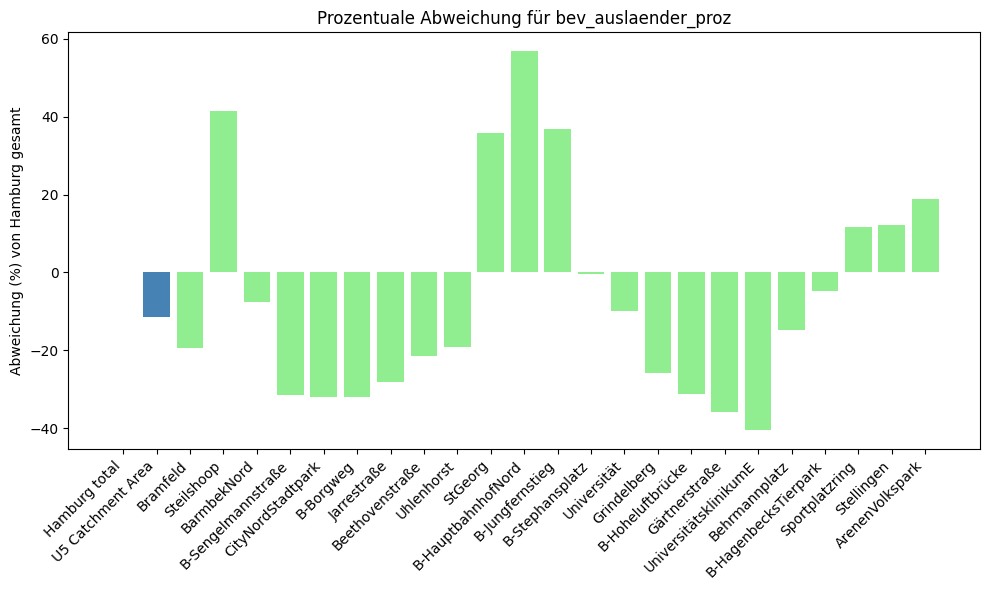

In [16]:
plot_barchart(statistik, 'bev_auslaender_proz', normieren = True)

In [17]:
statistik.index

Index(['bev_u18_proz', 'bev_18_bis_u30_proz', 'bev_30_bis_u56_proz',
       'bev_ab56_proz', 'bev_ab65_proz', 'bev_auslaender_proz',
       'bev_migrationshintergrund_proz', 'bev_u18_migrationshintergrund_proz',
       'bev_ab65_migrationshintergrund_proz',
       'wohn_avg_wohnflaeche_in_qm_pro_einw',
       'inf_schueler_in_gymn_an_allen_sekundarstufe_1_proz',
       'arb_arbeitslose_ingesamt_proz', 'ver_private_pkw_je_1000_ew_anz',
       'hau_haushaltgroesse_avg', 'hau_einpersonenhaushalte_proz',
       'hau_haushalte_mit_kindern_proz', 'hau_alleinerziehende_proz',
       'flaeche_einw_pro_ha', 'wohn_ant_sozialwohnungen_an_allen_wohnungen',
       'inf_niedergelassene_aerzte_anz',
       'wohn_avg_immobilienpreis_eigt_wohnung_euro_pro_qm'],
      dtype='object', name='Indikatoren')